In [ ]:
%matplotlib inline

# 변형(Transform)

데이터가 항상 머신러닝 알고리즘의 학습에 필요한 최종 처리가 된 형태로 제공되지는 않는다. 학습에 적합하게
**변형(transform)**을 해야하는 경우가 많다.

`TorchVision` 데이터셋들은 데이터의 사전 처리를 지원하기 위해서 두 개의 매개변수 ``transform``과 ``target_transform``을 지원한다. ``transform``은 입력 피처(feature)에, ``target_transform``은 라벨(label)에 적용될 전처리 루틴이다.

아래의 예에서는 CIFAR-10 데이터셋을 사용한다. 
CIFAR-10 데이터셋은 60,000장의 32x32 컬러 이미지로 구성되며, 트레인 이미지는 50,000개, 테스트 이미지는 10,000개이다. 이미지는 다음과 같이 10개의 클래스로 분류되어 있다. 

```
airplane										
automobile										
bird										
cat										
deer										
dog										
frog										
horse										
ship										
truck
```

CIFAR-10 데이터셋에서 이미지는 PIL Image 형식이며, 정답(label)은 0에서서 9사이의의 정수(integer)이다. 학습을 하려면 이미지는 정규화(normalize)된 텐서 형태로 변환해야하고, 라벨은 원-핫(one-hot)으로 부호화(encode)해야 할 수도 있다. 다음 예에서는 이러한 변형(transformation)을 하기 위해 `torchvision.transforms` 패키지가 제공하는 ``ToTensor``, `Resize`, `Normalize`, ``Lambda``와 같은 미리 정의된(pre-built) 변환 모듈을 사용한다.

In [ ]:
import torch
from torchvision import datasets
import torchvision.transforms as transforms

train_ds = datasets.CIFAR10(
    root="data",
    train=True,
    download=True,
        
    transform = transforms.Compose([
                       transforms.ToTensor(), 
                       transforms.Resize((36,36)),
                       transforms.RandomCrop((32, 32)),
                       transforms.RandomHorizontalFlip(),
                       transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])]),
    target_transform = transforms.Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)

test_ds = datasets.CIFAR10(
    root="data",
    train=False,
    download=True,
        
    transform = transforms.Compose([
                       transforms.ToTensor(), 
                       transforms.Resize((32,32)),
                       transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]) ]),
    target_transform = transforms.Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)

100%|██████████| 170498071/170498071 [00:02<00:00, 67040417.91it/s]


Extracting data/cifar-10-python.tar.gz to data
Files already downloaded and verified


In [ ]:
X, y = train_ds[0]
print(X)
print(X.shape)
print(X.mean(), X.std(), X.max(), X.min())

print(y)
print(y.shape)

tensor([[[-0.8183, -0.9229, -0.8522,  ...,  0.0787,  0.0792,  0.0765],
         [-0.8235, -0.8951, -0.7460,  ...,  0.0186,  0.0668,  0.0601],
         [-0.7656, -0.7685, -0.5267,  ...,  0.0240,  0.0603,  0.0499],
         ...,
         [ 0.6514,  0.5214,  0.3296,  ...,  0.0802,  0.0745,  0.2913],
         [ 0.7098,  0.5725,  0.4318,  ...,  0.0702,  0.0185,  0.2667],
         [ 0.6889,  0.5952,  0.5179,  ..., -0.0520, -0.2294,  0.0041]],

        [[-0.7882, -0.9146, -0.9002,  ..., -0.2329, -0.2211, -0.2098],
         [-0.8205, -0.9370, -0.8659,  ..., -0.2865, -0.2316, -0.2294],
         [-0.8070, -0.8702, -0.7210,  ..., -0.2892, -0.2550, -0.2580],
         ...,
         [ 0.3129,  0.0899, -0.0670,  ..., -0.2114, -0.2203, -0.0063],
         [ 0.3961,  0.1673,  0.0763,  ..., -0.1871, -0.2270,  0.0118],
         [ 0.3908,  0.2198,  0.1963,  ..., -0.2620, -0.4303, -0.2233]],

        [[-0.7869, -0.9155, -0.9431,  ..., -0.5244, -0.4972, -0.4797],
         [-0.8375, -0.9729, -0.9673,  ..., -0

/usr/local/lib/python3.9/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


**Note:** 어떤 손실함수를 사용하느냐에 따라서 원-핫 인코딩을 하지 않아도 되는 경우도 있다. `Quick Start` 튜토리얼에서 사용한 `nn.CrossEntropyLoss()`는 원-핫 인코딩을 해주지 않아도 된다.

## `TorchVision`이 제공하는 미리 정의된 `transform` 기능들

`torchvision.transforms`은 이미지 데이터에 대한 다양한 변환 기능을 제공한다. 자세한 사항은 [여기](https://pytorch.org/vision/stable/transforms.html)를 참조하라. 자주 활용되는 변환으로는 다음과 같은 것들이 있다.

**`ToTensor()`**: [`ToTensor`](https://pytorch.org/vision/stable/generated/torchvision.transforms.ToTensor.html#torchvision.transforms.ToTensor)는 PIL Image나 NumPy ``ndarray`` 를  ``FloatTensor`` 로 변환하고, 이미지의 픽셀의 크기(intensity) 값을 [0., 1.] 범위로
비례하여 조정(scale)한다.

**`Resize()`**: Resize()는 이미지를 지정된 크기로 resizing한다.

**`Normalize()`**: 픽셀값을 지정된 평균(mean)과 표준편차(std)로 표준화(standardization)한다.

**`RandomCrop()`과 `RandomHorizontalFlip()`**: 이미지의 일부를 랜덤 크롭(crop)하고, 또한한 랜덤하게게 수평적으로로 플립립(flip)한다다. 이런 방식으로 학습 데티어를 인위적으로 늘리는 것을 **데이터 첨가(Data Augmentation)**라고 부른다.  

`transforms.Compose`는 여러 변환들을 합성한 변환 파이프라인을 정의한다.


In [ ]:
transform = transforms.Compose([
                       transforms.ToTensor(), 
                       transforms.Resize((36,36)),
                       transforms.RandomCrop((32, 32)),
                       transforms.RandomHorizontalFlip(),
                       transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])]),

#### Lambda 변형(Transform)

Lambda 변형은 사용자 정의 람다(lambda) 함수를 적용한다. 여기에서는 정수를 원-핫으로 부호화된 텐서로 바꾸는 함수를 정의한다.
이 함수는 먼저 (데이터셋 정답의 개수인) 크기 10짜리 영 텐서(zero tensor)를 만들고,
[`scatter_`](<https://pytorch.org/docs/stable/generated/torch.Tensor.scatter_.html>)를 호출하여
주어진 정답 ``y``에 해당하는 인덱스에 ``value=1``을 할당한다.



In [ ]:
target_transform = transforms.Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))

## **사례: 얼굴 포즈(facial pose) 데이터셋**

이하의 내용은 [링크](https://pytorch.org/tutorials/beginner/data_loading_tutorial.html)된 큐토리얼을 부분적으로 수정한 것이다.

In [ ]:
import os
import torch
import pandas as pd
# from skimage import io, transform
# from skimage import io
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
from PIL import Image

[여기](https://download.pytorch.org/tutorial/faces.zip)에서 데이터셋을 다운로드하여 적절한 곳에 압축을 해제하여 저장한다. 

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
data_dir = '/content/drive/MyDrive/딥러닝/faces'

## 데이터셋에는 다음과 같은 형식으로 얼굴 랜드마크 정보를 저장하는 하나의 주석(anotation) 파일 `face_landmarks.csv`이 포함되어 있다.

```
image_name,part_0_x,part_0_y,part_1_x,part_1_y,part_2_x, ... ,part_67_x,part_67_y
0805personali01.jpg,27,83,27,98, ... 84,134
1084239450_e76e00b7e7.jpg,70,236,71,257, ... ,128,312
```

주석 파일을 pandas의 데이터프레임으로 열어서 살펴보자.
파일의 첫 줄은 헤드라인(headline)이고, 다음 줄 부터 각 행은 하나의 이미지 파일명과 136개의 정수로 구성된다. 이 정수들은 이미지상에 68개의 랜드마크 포인트의 좌표를 나타낸다.

In [ ]:
landmarks_frame = pd.read_csv(data_dir + '/face_landmarks.csv')
landmarks_frame

,image_name,part_0_x,part_0_y,part_1_x,part_1_y,part_2_x,part_2_y,part_3_x,part_3_y,part_4_x,...,part_63_x,part_63_y,part_64_x,part_64_y,part_65_x,part_65_y,part_66_x,part_66_y,part_67_x,part_67_y
0,0805personali01.jpg,27,83,27,98,29,113,33,127,39,...,93,136,100,141,93,135,89,135,84,134
1,1084239450_e76e00b7e7.jpg,70,236,71,257,75,278,82,299,90,...,148,311,179,308,149,312,137,314,128,312
2,10comm-decarlo.jpg,66,114,65,128,67,142,68,156,72,...,128,162,136,167,127,166,121,165,116,164
3,110276240_bec305da91.jpg,42,140,45,161,51,180,61,200,73,...,144,197,180,189,147,204,136,208,125,209
4,1198_0_861.jpg,138,392,141,427,145,464,152,501,166,...,293,507,331,511,294,516,279,518,265,516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,matt-mathes.jpg,85,152,83,173,83,195,85,217,91,...,160,224,190,225,162,236,151,237,141,235
65,person-7.jpg,32,65,33,76,34,86,34,97,37,...,79,98,91,99,79,99,74,99,69,99
66,person.jpg,78,83,79,93,80,103,81,112,85,...,119,115,132,114,120,121,114,122,109,121
67,person_TjahjonoDGondhowiardjo.jpg,41,92,41,103,43,114,44,125,48,...,85,130,94,130,85,128,81,128,77,128


다음은 66번 행을 자세히 살표보기 위한 코드이다.

In [ ]:
n = 66
img_name = landmarks_frame.iloc[n, 0]
landmarks = landmarks_frame.iloc[n, 1:]
landmarks = np.asarray(landmarks)
landmarks = landmarks.astype('float').reshape(-1, 2)

print('Image name: {}'.format(img_name))
print('Landmarks shape: {}'.format(landmarks.shape))
print('First 4 Landmarks: {}'.format(landmarks[:4]))

Image name: person.jpg
Landmarks shape: (68, 2)
First 4 Landmarks: [[ 78.  83.]
 [ 79.  93.]
 [ 80. 103.]
 [ 81. 112.]]


이미지 위에 랜프마크 점들을 표시하여 디스플레이해보자.

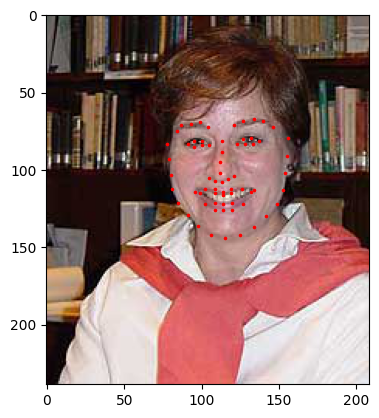

In [ ]:
def show_landmarks(image, landmarks):
    """Show image with landmarks"""
    plt.imshow(image)
    plt.scatter(landmarks[:, 0], landmarks[:, 1], s=10, marker='.', c='r')
    plt.show()

show_landmarks(Image.open(os.path.join(data_dir, img_name)), landmarks)


이제 이 데이터셋을 표현하는 커스텀 데이터셋 클래스 `FaceLandmarksDataset`를 정의해보자.

In [ ]:
class FaceLandmarksDataset(Dataset):
    """Face Landmarks dataset."""

    def __init__(self, csv_file, root_dir, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.landmarks_frame = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.landmarks_frame)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_name = os.path.join(self.root_dir, # 주석 파일을 찾고 
                                self.landmarks_frame.iloc[idx, 0])
        image = np.array(Image.open(img_name)) # PIL Image를 numpy array로 변환한다.

        landmarks = self.landmarks_frame.iloc[idx, 1:]
        landmarks = np.array([landmarks])
        landmarks = landmarks.astype('float').reshape(-1, 2)
        sample = {'image': image, 'landmarks': landmarks} # 딕셔너리 형태로 저장 가능 

        if self.transform:
            sample = self.transform(sample)

        return sample

데이터셋을 생성하고 4개의 데이터를 추출하여 디스플레이해본다.

0 (324, 215, 3) (68, 2)


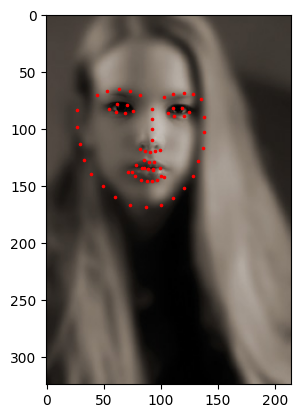

1 (500, 333, 3) (68, 2)


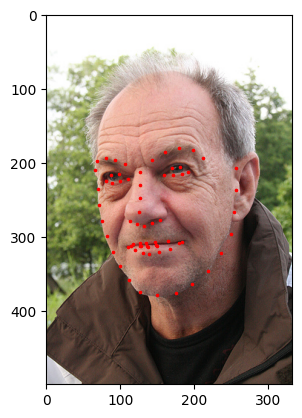

2 (250, 258, 3) (68, 2)


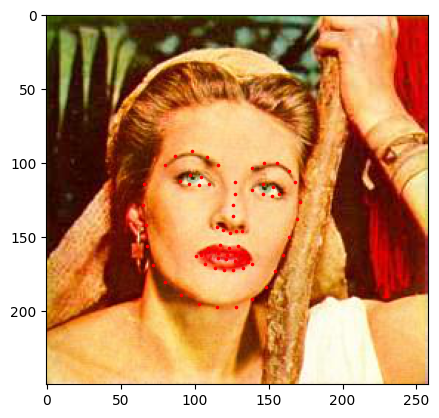

3 (434, 290, 3) (68, 2)


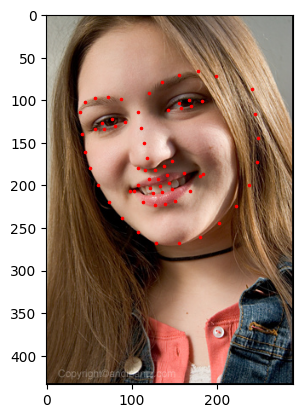

In [ ]:
face_dataset = FaceLandmarksDataset(csv_file=data_dir + '/face_landmarks.csv',
                                    root_dir=data_dir)

# fig = plt.figure()

for i, sample in enumerate(face_dataset):
    # sample = face_dataset[i]

    print(i, sample['image'].shape, sample['landmarks'].shape)
    show_landmarks(sample['image'], sample['landmarks'])

    # ax = plt.subplot(1, 4, i + 1)
    # plt.tight_layout()
    # ax.set_title('Sample #{}'.format(i))
    # ax.axis('off')
    # show_landmarks(**sample) 

    if i == 3:
        # plt.show()
        break

이 데이터셋에 속한 이미지들은 크기가 균일하지 않다. 따라서 이미지들을 동일한 크기로 resize해야 한다. 이때 이미지의 크기가 변경되면 랜드마크 포인트들의 좌표도 따라서 변경되어야 한다. 이런 일을 수행하는 custom transform을 정의한다. 

In [ ]:
sample = face_dataset[0]
image, landmark = sample['image'], sample['landmarks']
print(image.shape[:])
print(np.random.randint(0,10))

(324, 215, 3)
6


In [ ]:
class Rescale(object):
    """Rescale the image in a sample to a given size.

    Args:
        output_size (tuple): Desired output size. 
    """

    def __init__(self, output_size):
        self.output_size = output_size 

    def __call__(self, sample):
        image, landmarks = sample['image'], sample['landmarks']
        h, w = image.shape[:2]
        new_h, new_w = self.output_size

        img = Image.fromarray(image)
        img = img.resize((new_h, new_w), resample=0)
        img = np.array(img)
        # img = transform.resize(image, (new_h, new_w))

        # h and w are swapped for landmarks because for images,
        # x and y axes are axis 1 and 0 respectively
        landmarks = landmarks * [new_w / w, new_h / h]

        return {'image': img, 'landmarks': landmarks}

In [ ]:
class RandomCrop(object):
    """Crop randomly the image in a sample.

    Args:
        output_size (tuple): Desired output size. 
    """

    def __init__(self, output_size): 
        self.output_size = output_size

    def __call__(self, sample):
        image, landmarks = sample['image'], sample['landmarks']

        h, w = image.shape[:2]
        new_h, new_w = self.output_size

        top = np.random.randint(0, h - new_h)
        left = np.random.randint(0, w - new_w)

        image = image[top: top + new_h,
                      left: left + new_w]

        landmarks = landmarks - [left, top]

        return {'image': image, 'landmarks': landmarks}

정의한 `Rescale`과 `RandomCrop` 변환을 간단히 테스트해보자.

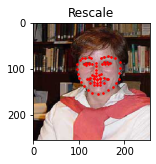

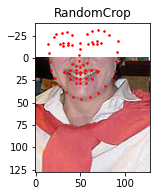

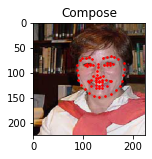

In [ ]:
scale = Rescale((256, 256))
crop = RandomCrop((128, 128))
composed = transforms.Compose([Rescale((256, 256)),
                               RandomCrop((224, 224))])

# Apply each of the above transforms on sample.
fig = plt.figure()
sample = face_dataset[66]
for i, tsfrm in enumerate([scale, crop, composed]):
    transformed_sample = tsfrm(sample)

    ax = plt.subplot(1, 3, i + 1)
    plt.tight_layout()
    ax.set_title(type(tsfrm).__name__)
    show_landmarks(**transformed_sample)

plt.show()

추가로 numpy 배열 형태의 이미지를 Tensor로 변환하고 정규화하는 MyToTensor를 작성해보자.

In [ ]:
class MyToTensor(object):
    """Convert ndarrays in sample to Tensors."""
    def __init__(self):
        self.img_tensorfier = transforms.Compose([
                       transforms.ToTensor(), 
                       transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)) ]) # Normalize가 하는 일은 무엇인가
        
    def __call__(self, sample):
        image, landmarks = sample['image'], sample['landmarks']

        # swap color axis because
        # numpy image: H x W x C
        # torch image: C x H x W
        image = self.img_tensorfier(image)

        # image = image.transpose((2, 0, 1))
        return {'image': image, #torch.from_numpy(image),
                'landmarks': torch.from_numpy(landmarks)}

In [ ]:
transformed_dataset = FaceLandmarksDataset(csv_file=data_dir + '/face_landmarks.csv',
                                           root_dir=data_dir,
                                           transform=transforms.Compose([
                                               Rescale((256, 256)),
                                               RandomCrop((224, 224)),
                                               MyToTensor()
                                           ]))

for i in range(len(transformed_dataset)):
    sample = transformed_dataset[i]

    print(i, sample['image'].size(), sample['landmarks'].size())
    print(sample['image'].min(), sample['image'].max())

    if i == 3:
        break

0 torch.Size([3, 224, 224]) torch.Size([68, 2])
tensor(-1.) tensor(0.5765)
1 torch.Size([3, 224, 224]) torch.Size([68, 2])
tensor(-1.) tensor(1.)
2 torch.Size([3, 224, 224]) torch.Size([68, 2])
tensor(-1.) tensor(1.)
3 torch.Size([3, 224, 224]) torch.Size([68, 2])
tensor(-1.) tensor(1.)


데이터로더를 생성하고 샘플 데이터 배치를 추출하여 디스플레이해보자.

0 torch.Size([4, 3, 224, 224]) torch.Size([4, 68, 2])
1 torch.Size([4, 3, 224, 224]) torch.Size([4, 68, 2])
2 torch.Size([4, 3, 224, 224]) torch.Size([4, 68, 2])
3 torch.Size([4, 3, 224, 224]) torch.Size([4, 68, 2])


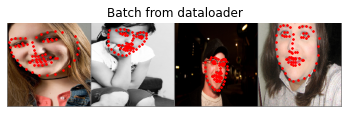

In [ ]:
dataloader = DataLoader(transformed_dataset, batch_size=4,
                        shuffle=True, num_workers=0)


# Helper function to show a batch
def show_landmarks_batch(sample_batched):
    """Show image with landmarks for a batch of samples."""
    images_batch, landmarks_batch = \
            sample_batched['image'], sample_batched['landmarks']
    batch_size = len(images_batch)
    im_size = images_batch.size(2)
    grid_border_size = 2

    grid = utils.make_grid(images_batch)
    grid = grid / 2 + 0.5 
    plt.imshow(grid.numpy().transpose((1, 2, 0)))

    for i in range(batch_size):
        plt.scatter(landmarks_batch[i, :, 0].numpy() + i * im_size + (i + 1) * grid_border_size,
                    landmarks_batch[i, :, 1].numpy() + grid_border_size,
                    s=10, marker='.', c='r')

        plt.title('Batch from dataloader')

# if you are using Windows, uncomment the next line and indent the for loop.
# you might need to go back and change "num_workers" to 0. 

# if __name__ == '__main__':
for i_batch, sample_batched in enumerate(dataloader):
    print(i_batch, sample_batched['image'].size(),
          sample_batched['landmarks'].size())

    # observe 4th batch and stop.
    if i_batch == 3:
        plt.figure()
        # show_landmarks(sample_batched['image'][0].numpy().transpose((1, 2, 0)), sample_batched['landmarks'][0])
        show_landmarks_batch(sample_batched)
        plt.axis('off')
        plt.ioff()
        plt.show()
        break